In [1]:
import pandas as pd
import numpy as np

In [5]:
fake_news = pd.read_csv('data/Fake.csv')
real_news = pd.read_csv('data/True.csv')

In [6]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
real_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [10]:
real_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [11]:
fake_news.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [12]:
real_news.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [15]:
real_news['is_fake'] = 0
fake_news['is_fake'] = 1

data = pd.concat([real_news, fake_news])
data.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [19]:
data.reset_index()
data.head()

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [20]:
data = data.sample(frac=1)
data

,title,text,subject,date,is_fake
5623,Elon Musk's Tesla and SpaceX oppose Trump immi...,(Reuters) - Elon Musk’s Tesla Inc and SpaceX o...,politicsNews,"February 6, 2017",0
17354,"Trump to visit Asia Nov. 3-14, focus on North ...",WASHINGTON (Reuters) - U.S. President Donald T...,worldnews,"October 16, 2017",0
21902,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...,It s not for her to decide! We have the Second...,left-news,"Apr 6, 2015",1
4678,Trump to sign order on Tuesday easing energy r...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 26, 2017",0
2759,U.S. House may be near deal on stalled Russia ...,WASHINGTON (Reuters) - U.S. congressional nego...,politicsNews,"July 14, 2017",0
...,...,...,...,...,...
14284,Czech police ask parliament to allow prosecuti...,PRAGUE (Reuters) - Czech police have requested...,worldnews,"November 21, 2017",0
6288,WATCH: Louisiana GOP Rep SLAMS Her Sexist Mal...,It was an epic shaming they all deserved.When ...,News,"May 19, 2016",1
2555,Kushner interviewed by House intelligence panel,"WASHINGTON (Reuters) - Jared Kushner, adviser ...",politicsNews,"July 25, 2017",0
13712,Chinese general kills himself amid corruption ...,BEIJING (Reuters) - A prominent Chinese genera...,worldnews,"November 28, 2017",0


In [21]:
data = data.drop(['date', 'subject'], axis=1)

In [24]:
X_data = data.drop('is_fake', axis=1)
y_data = data['is_fake']
X_data

,title,text
5623,Elon Musk's Tesla and SpaceX oppose Trump immi...,(Reuters) - Elon Musk’s Tesla Inc and SpaceX o...
17354,"Trump to visit Asia Nov. 3-14, focus on North ...",WASHINGTON (Reuters) - U.S. President Donald T...
21902,TROLL CONGRESSWOMAN WANTS YOU TO SELL YOUR GUN...,It s not for her to decide! We have the Second...
4678,Trump to sign order on Tuesday easing energy r...,WASHINGTON (Reuters) - President Donald Trump ...
2759,U.S. House may be near deal on stalled Russia ...,WASHINGTON (Reuters) - U.S. congressional nego...
...,...,...
14284,Czech police ask parliament to allow prosecuti...,PRAGUE (Reuters) - Czech police have requested...
6288,WATCH: Louisiana GOP Rep SLAMS Her Sexist Mal...,It was an epic shaming they all deserved.When ...
2555,Kushner interviewed by House intelligence panel,"WASHINGTON (Reuters) - Jared Kushner, adviser ..."
13712,Chinese general kills himself amid corruption ...,BEIJING (Reuters) - A prominent Chinese genera...


In [25]:
y_data

5623     0
17354    0
21902    1
4678     0
2759     0
        ..
14284    0
6288     1
2555     0
13712    0
13498    0
Name: is_fake, Length: 44898, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train = train.drop('is_fake', axis=1)
y_train = train['is_fake']
X_test = test.drop('is_fake', axis=1)
y_test = test['is_fake']

In [61]:
train_news = X_train.loc[(y_train==0),:]
train_fake = X_train.loc[(y_train==1),:]

Lexical Diversity of Fake News
Let's define a measure for lexical diversity to find out how many unique vocabs are used in Fake News articles.

Let's define the lexical diversity measure as  $$(number of unique words in one (target)category)/(number of words in both (target)categories)$$

In [62]:
import string

def lexical_diversity(data, other_data, feature):
    column = data[feature].str.lower() 
    text = ' '.join(column)
    exclude = set(string.punctuation)
    words = ''.join(char for char in text if char not in exclude)
    words_splitted = words.split()
    
    other_column = other_data[feature].str.lower() 
    other_text = ' '.join(other_column)
    other_words = ''.join(char for char in other_text if char not in exclude)
    other_words_splitted = other_words.split()
    return len(set(words_splitted)) / (len(words_splitted) + len(other_words_splitted))

print(f'Real News: {lexical_diversity(data=train_news, other_data=train_fake, feature="text")}')
print(f'Fake News: {lexical_diversity(data=train_fake, other_data=train_news, feature="text")}')

Real News: 0.006294032185917213
Fake News: 0.01156760945519279


Interestingly it seems like Fake News contain almost two times greater lexical diversity than real news. Their authors seem to have a wide vocabulary.

In [63]:
import regex as re

def count_punctuation(text):
    peri = re.subn(r"\.", '', text)[1]
    comm = re.subn(r"\,", '', text)[1]
    ques = re.subn(r"\?", '', text)[1]
    excl = re.subn(r"\!", '', text)[1]
    return [peri,comm, ques, excl]

In [64]:
def create_punctuation_df(dataset, feature):
    return dataset.apply(lambda row: pd.Series({'peri_' + feature:count_punctuation(row[feature])[0], 
                                                       'comm_' + feature:count_punctuation(row[feature])[1],
                                                      'ques_' + feature:count_punctuation(row[feature])[2],
                                                      'excl_' + feature:count_punctuation(row[feature])[3]}), axis=1)

punctuation_train_title = create_punctuation_df(train, 'title')
punctuation_test_title = create_punctuation_df(test, 'title')
punctuation_train_text = create_punctuation_df(train, 'text')
punctuation_test_text = create_punctuation_df(test, 'text')
punctuation_train_text 

,peri_text,comm_text,ques_text,excl_text
22614,5,6,0,0
9659,5,2,0,0
12873,16,11,0,2
7326,26,16,0,0
7349,24,22,0,0
...,...,...,...,...
7890,31,41,0,0
15343,31,51,5,0
23297,10,5,1,0
8551,39,51,2,1


In [65]:
def create_len_df(dataset):
    return dataset.apply(lambda row: pd.Series({'length_title':len(row['title']),
                                               'length_text':len(row['text'])}), axis=1)

len_train = create_len_df(train)
len_test = create_len_df(test)

len_train

,length_title,length_text
22614,32,682
9659,75,493
12873,68,1498
7326,54,2550
7349,67,2362
...,...,...
7890,60,3766
15343,102,5140
23297,79,777
8551,90,6092


In [66]:
def create_num_words_df(dataset):
    return dataset.apply(lambda row: pd.Series({'num_words_title':len(row['title'].split())}), axis=1)

num_words_train = create_num_words_df(train)
num_words_test = create_num_words_df(test)

num_words_train

,num_words_title
22614,4
9659,9
12873,11
7326,9
7349,10
...,...
7890,12
15343,16
23297,15
8551,16


In [67]:
def create_title_ratio_df(dataset):
    return dataset.apply(lambda row: pd.Series({'title_ratio':len(row['title'])/(len(row['title']) + len(row['text']))}), axis=1)

title_ratio_train = create_title_ratio_df(train)
title_ratio_test = create_title_ratio_df(test)

title_ratio_train

,title_ratio
22614,0.044818
9659,0.132042
12873,0.043423
7326,0.020737
7349,0.027583
...,...
7890,0.015682
15343,0.019458
23297,0.092290
8551,0.014558


In [68]:
X_train_punct_len = pd.concat([punctuation_train_title, 
                               punctuation_train_text, 
                               len_train, 
                               num_words_train, 
                               title_ratio_train], 
                              axis=1)

X_test_punct_len = pd.concat([punctuation_test_title, 
                              punctuation_test_text, 
                              len_test, 
                              num_words_test, 
                              title_ratio_test], 
                             axis=1)

X_train_punct_len

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
22614,0,0,0,0,5,6,0,0,32,682,4,0.044818
9659,0,2,0,0,5,2,0,0,75,493,9,0.132042
12873,2,1,0,0,16,11,0,2,68,1498,11,0.043423
7326,0,0,1,0,26,16,0,0,54,2550,9,0.020737
7349,0,1,0,0,24,22,0,0,67,2362,10,0.027583
...,...,...,...,...,...,...,...,...,...,...,...,...
7890,0,0,0,0,31,41,0,0,60,3766,12,0.015682
15343,0,0,0,0,31,51,5,0,102,5140,16,0.019458
23297,0,0,0,0,10,5,1,0,79,777,15,0.092290
8551,0,0,0,0,39,51,2,1,90,6092,16,0.014558


In [69]:
X_train_punct_len.describe()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
count,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000,35918.000000
mean,0.272203,0.225096,0.042319,0.079849,21.009355,20.245949,0.686091,0.407762,80.159168,2473.177488,12.455565,0.071505
std,0.696458,0.498378,0.213532,0.297131,18.453084,20.209241,1.840099,1.499004,25.504179,2175.182838,4.124326,0.135019
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,0.000583
25%,0.000000,0.000000,0.000000,0.000000,10.000000,8.000000,0.000000,0.000000,63.000000,1239.000000,10.000000,0.023292
50%,0.000000,0.000000,0.000000,0.000000,18.000000,17.000000,0.000000,0.000000,73.000000,2187.000000,11.000000,0.034863
75%,0.000000,0.000000,0.000000,0.000000,27.000000,27.000000,1.000000,0.000000,91.000000,3111.000000,14.000000,0.063379
max,6.000000,5.000000,3.000000,4.000000,555.000000,518.000000,94.000000,133.000000,286.000000,51794.000000,42.000000,0.995556


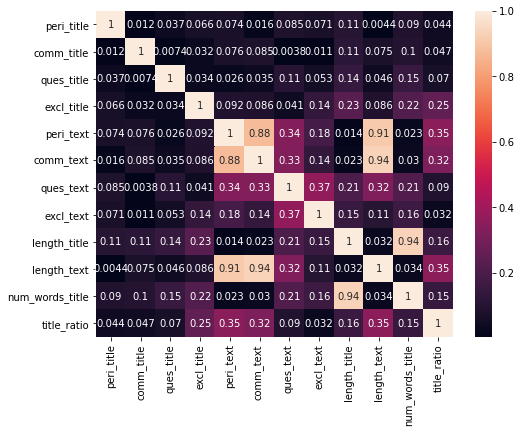

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(np.abs(X_train_punct_len.corr()), annot=True)
plt.savefig('correlation')
plt.show()

In [71]:
pd.concat([X_train_punct_len, y_train], axis=1).groupby('is_fake').mean()

,peri_title,comm_title,ques_title,excl_title,peri_text,comm_text,ques_text,excl_text,length_title,length_text,num_words_title,title_ratio
is_fake,,,,,,,,,,,,
0,0.466343,0.250366,0.006667,0.000994,21.042049,19.430493,0.099655,0.061466,64.612433,2384.794666,9.946079,0.048259
1,0.095807,0.202136,0.074712,0.151496,20.979648,20.986875,1.218928,0.722408,94.284978,2553.482385,14.735693,0.092627


In [72]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
preds = cross_val_predict(rf, X_train_punct_len, y_train, cv=5)
f1 = f1_score(y_true=y_train, y_pred=preds)
acc = accuracy_score(y_true=y_train, y_pred=preds)
print(f'f1: {f1}\nacc: {acc}')

f1: 0.9300466713159166
acc: 0.9273901664903391
